In [1]:
# run stopwatch
from tools import Stopwatch
stopwatch = Stopwatch()
start = stopwatch.start()

### Load libraries, functions, palette, theme

In [2]:
%run _libraries.ipynb

In [3]:
%run _functions.ipynb

In [4]:
dir_save = 'Section3-Feature-selection-and-Preprocessing'

# Section III. Feature selection and Preprocessing

## Load Saved Section if exists

## Load Data

In [5]:
# dicts
datasets_dict = loadit(
    'datasets_dict', dir='Section2-Explore-and-Clean')
features_dict = loadit(
    'features_dict', dir='Section1-Overview-and-Base-model')
transform_dict = loadit(
    'transform_dict', dir='Section1-Overview-and-Base-model')
groups_dict = loadit(
    'groups_dict', dir='Section2-Explore-and-Clean')
simulation_datasets_dict = loadit(
    'simulation_datasets_dict', dir='Section2-Explore-and-Clean')
estimators_dict = loadit(
    'estimators_dict', dir='Section2-Explore-and-Clean')
evaluation_dict = loadit(
    'evaluation_dict', dir='Section2-Explore-and-Clean')
# datasets
train = datasets_dict['train'].copy()
train_raw = datasets_dict['train'].copy()
# features
features = features_dict['features']
numeric = features_dict['numeric']
ordinal = features_dict['ordinal']
categorical = features_dict['categorical']
categorical_transform = features_dict['categorical_transform']
target = features_dict['target']

## Feature Selection

### Feature Engineering

Explore features groups and try to find ways to create new features.

#### Square Feet Features

**New Features**:
1. Floors square mean: mean of 'first_flrsf' and 'second_flrsf' (with weight: 0.5).  
   *Suggestion*: people interest in first floor square more than in second (coeff: 0.5). So, mean of floors' square with weight would work better, than living area square. 

In [6]:
features_square = groups_dict['features_square']

In [7]:
train_square = create_df_group(features_square)

In [8]:
train_square.head()

,bsmtfinsf_first,bsmtfinsf_second,bsmtunfsf,totalbsmtsf,first_flrsf,second_flrsf,grlivarea,lowqualfinsf,masvnrarea,wooddecksf,openporchsf,enclosedporch,three_ssnporch,screenporch,poolarea,price
907,223,0,794,1017,1020,1037,2057,0,0.0,0,0,0,0,322,0,12.429216
782,0,0,1413,1413,1430,0,1430,0,0.0,0,33,0,0,0,0,12.139399
952,660,0,108,768,768,0,768,0,0.0,192,0,0,0,0,0,11.804849
620,41,0,823,864,864,0,864,0,0.0,0,0,100,0,0,0,11.112448
669,0,0,700,700,1180,0,1180,0,0.0,0,0,67,0,0,0,11.831379


In [9]:
train_square.shape

(1311, 16)

In [10]:
train_square['flrsfmean'] = \
    (train_square['first_flrsf'] + 0.7*train_square['second_flrsf']) / 1.7

In [11]:
correlation_w_target(train_square, target)

,price
flrsfmean,0.769461
grlivarea,0.717235
totalbsmtsf,0.644327
first_flrsf,0.613694
masvnrarea,0.417913
bsmtfinsf_first,0.371451
wooddecksf,0.336964
openporchsf,0.316891
second_flrsf,0.307639
bsmtunfsf,0.230184


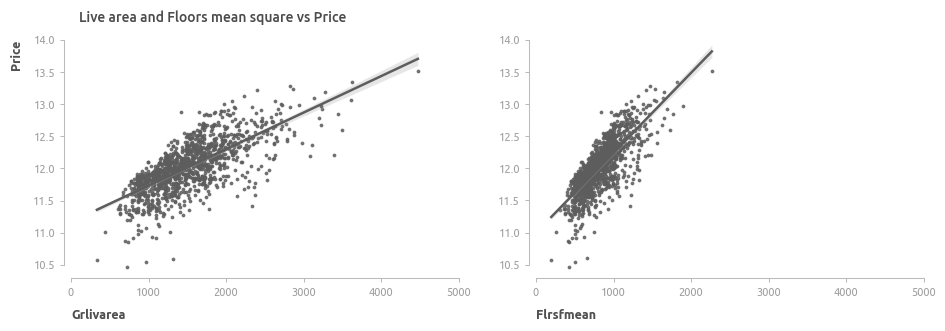

Image 'flrsfmean.svg' successfully saved into 'img/Section3-Feature-selection-and-Preprocessing' directory


In [12]:
fig, ax = plt.subplots(1, 2, figsize=(11,3))
fig.suptitle(
    'Live area and Floors mean square vs Price', x=0.2535, fontsize=10
)
sns.regplot(
    x=train_square['grlivarea'], y=train_square['price'],
    scatter_kws={'s': 3}, ax=ax[0]
)
ax[0].set_xlabel('Grlivarea')
ax[0].set_ylabel('Price')
axis_rstyle(
    ax=ax[0],
    x_ticks=[0, 5000, 1000],
    y_ticks=[10.5, 14.0, 0.5]
)

sns.regplot(
    x=train_square['flrsfmean'], y=train_square['price'],
    scatter_kws={'s': 3}, ax=ax[1]
)
ax[1].set_xlabel('Flrsfmean')
ax[1].set_ylabel(None)
axis_rstyle(
    ax=ax[1],
    x_ticks=[0, 5000, 1000],
    y_ticks=[10.5, 14.0, 0.5]
)

plt.show()

savefig('flrsfmean', dir_save)

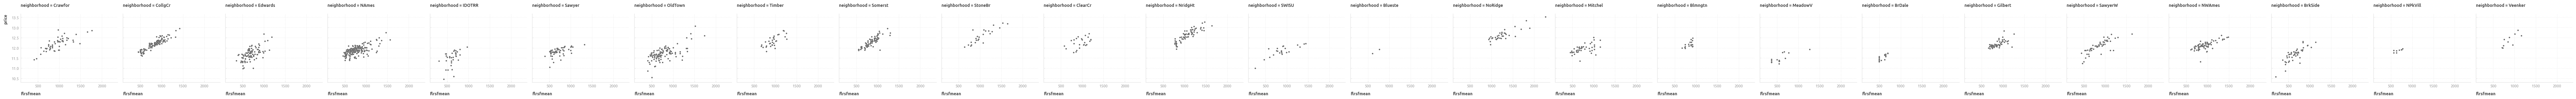

Image 'neighborhood.svg' successfully saved into 'img/Section3-Feature-selection-and-Preprocessing' directory


In [13]:
g_data = pd.concat([train, train_square['flrsfmean']], axis=1)
fig = sns.FacetGrid(g_data, col='neighborhood')
fig.fig.set_tight_layout(True)
fig.map(sns.scatterplot, 'flrsfmean', target, **scatter);
plt.show()

savefig('neighborhood', dir_save)

#### Rooms Features

**New features**:
1. Bedroom realtive size: bedrooms number / living area
2. Kitchen realtive size: kitchens number / living area
3. Bedrooms as fraction of rooms number: bedrooms number / rooms number
4. Kitchen as fraction of rooms number: kitchen number / rooms number
5. Bathrooms as fraction of bedrooms number: full bathrooms number / bedrooms number

In [14]:
features_rooms = groups_dict['features_rooms']

In [15]:
train_rooms = create_df_group(features_rooms)

In [16]:
train_rooms.head()

,bedroomabvgr,kitchenabvgr,totrmsabvgrd,bsmtfullbath,bsmthalfbath,fullbath,halfbath,price
907,3,1,6,0,0,1,1,12.429216
782,3,1,6,0,0,2,0,12.139399
952,2,1,5,0,1,1,0,11.804849
620,2,1,5,1,0,1,0,11.112448
669,2,1,5,0,0,1,0,11.831379


In [17]:
train_rooms['bedroomsize'] = \
    train_rooms['bedroomabvgr'] / train['grlivarea']

In [18]:
train_rooms['kitchensize'] = \
    train_rooms['kitchenabvgr'] / train['grlivarea']

In [19]:
train_rooms['bedroomfracrms'] = \
    train_rooms['bedroomabvgr'] / train_rooms['totrmsabvgrd']

In [20]:
train_rooms['kitchenfracrms'] = \
    train_rooms['kitchenabvgr'] / train_rooms['totrmsabvgrd']

In [21]:
train_rooms['bathsfracbedr'] = \
    train_rooms['fullbath'] / train_rooms['bedroomabvgr']

In [22]:
for f in ['bedroomfracrms', 'kitchenfracrms', 'bathsfracbedr']:
    train_rooms[f] = np.round(train_rooms[f], 4)

In [23]:
correlation_w_target(train_rooms, target)

,price
kitchensize,-0.712279
fullbath,0.587186
bedroomsize,-0.560241
kitchenfracrms,-0.550854
totrmsabvgrd,0.522715
bathsfracbedr,0.370568
bedroomfracrms,-0.310517
halfbath,0.301483
bsmtfullbath,0.227932
bedroomabvgr,0.194230


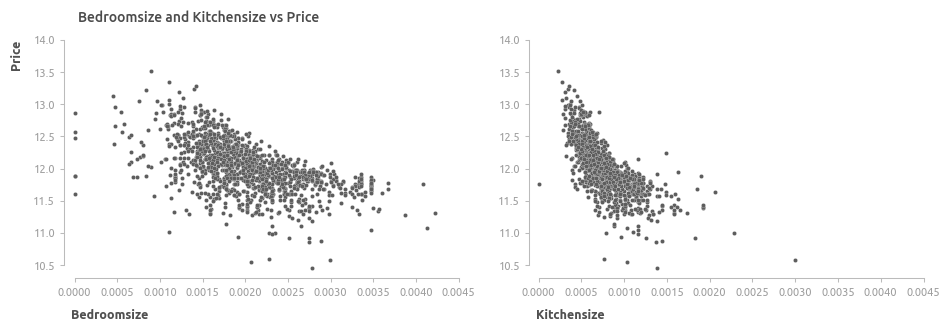

Image 'bedroom_kitchen.svg' successfully saved into 'img/Section3-Feature-selection-and-Preprocessing' directory


In [24]:
fig = plt.figure(figsize=(11,3))
fig.suptitle('Bedroomsize and Kitchensize vs Price', x=0.241, fontsize=10)
plt.subplot(1,2,1)
sns.scatterplot(x=train_rooms['bedroomsize'], y=train[target], **scatter)
plt.xlabel(str.capitalize('Bedroomsize'))
plt.ylabel(str.capitalize('Price'))
axis_rstyle(
    x_ticks=[0, 0.005, 0.0005],
    y_ticks=[10.5, 14.0, 0.5]
)

plt.subplot(1,2,2)
sns.scatterplot(x=train_rooms['kitchensize'], y=train[target], **scatter)
plt.xlabel(str.capitalize('Kitchensize'))
plt.ylabel(None)
axis_rstyle(
    x_ticks=[0, 0.005, 0.0005],
    y_ticks=[10.5, 14.0, 0.5]
)

plt.show()

savefig('bedroom_kitchen', dir_save)

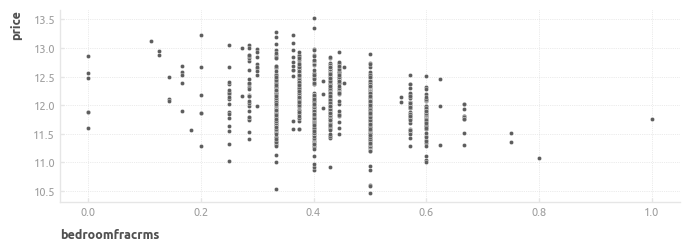

In [25]:
sns.scatterplot(x=train_rooms['bedroomfracrms'], y=train[target]);

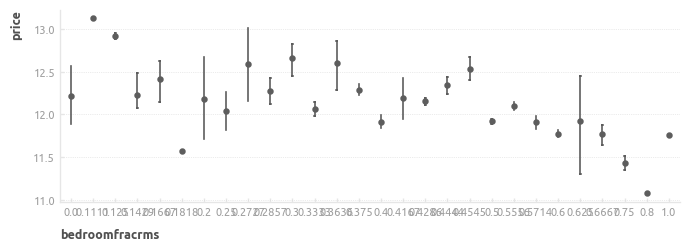

In [26]:
sns.pointplot(
    x=train_rooms['bedroomfracrms'], y=train[target], **point);

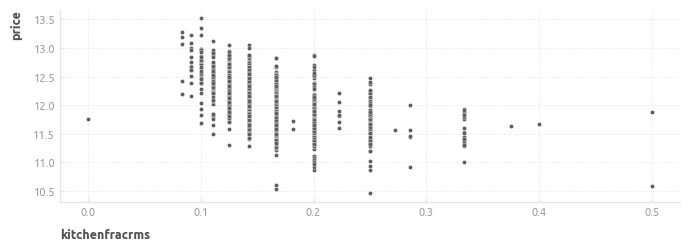

In [27]:
sns.scatterplot(x=train_rooms['kitchenfracrms'], y=train[target]);

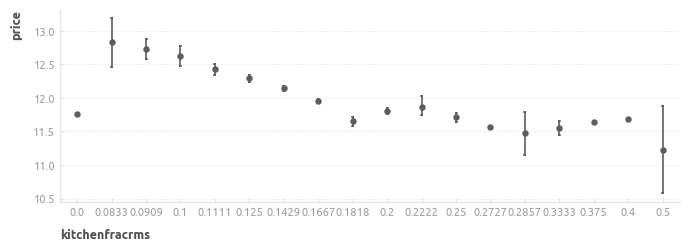

In [28]:
sns.pointplot(
    x=train_rooms['kitchenfracrms'], y=train[target], **point);

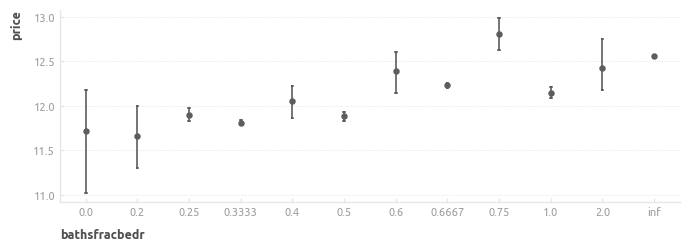

In [29]:
sns.pointplot(
    x=train_rooms['bathsfracbedr'], y=train[target], **point);

#### Year Features

**New features**:
1. House age at the moment of sale: year sold - year built
2. Modernization age: year sold - modernization year

In [30]:
features_year = groups_dict['features_year']
train_year = create_df_group(features_year)

In [31]:
train_year.head()

,garageyrblt,mosold,yrsold,yearbuilt,yearremodadd,price
907,1936.0,6,2006,1936,1987,12.429216
782,2001.0,6,2009,2001,2002,12.139399
952,1974.0,4,2009,1972,2003,11.804849
620,1914.0,9,2008,1914,1950,11.112448
669,1922.0,7,2006,1922,1950,11.831379


In [32]:
train_year['houseage'] = train_year['yrsold'] - train_year['yearbuilt']
train_year['modadd'] = \
    (train_year['yearremodadd']!=train_year['yearbuilt']).astype(int)
# if modernization exist, age of modernization equals (year sold - year modernization)
# if modernization doesn't exist, age of modernization equals (year sold - year built)
train_year['modage'] = \
    np.where(train_year['modadd']==1,
             train_year['yrsold'] - train_year['yearremodadd'],
             train_year['yrsold'] - train_year['yearbuilt'])

In [33]:
correlation_w_target(train_year, target)

,price
houseage,-0.589174
yearbuilt,0.588250
garageyrblt,0.571488
modage,-0.565807
yearremodadd,0.563118
modadd,-0.083947
mosold,0.072531
yrsold,-0.041683


#### Create New Features in Train Dataset

In [34]:
train['flrsfmean'] = \
    (train['first_flrsf'] + 0.7*train['second_flrsf']) / 1.7

In [35]:
train['bedroomsize'] = train['bedroomabvgr'] / train['grlivarea']

In [36]:
train['kitchensize'] = train['kitchenabvgr'] / train['grlivarea']

In [37]:
train['bedroomfracrms'] = train['bedroomabvgr'] / train['totrmsabvgrd']

# max value of 'bedroomfracrms' except inf
loc_value = (~np.isinf(train['bedroomfracrms']), 'bedroomfracrms')
value = train.loc[loc_value].max()

# fill inf values with max value
loc_r = np.isinf(train['bedroomfracrms'])
train.loc[loc_r, 'bedroomfracrms'] = value

In [38]:
train['kitchenfracrms'] = train['kitchenabvgr'] / train['totrmsabvgrd']

# max value of 'kitchenfracrms' except inf
loc_value = (~np.isinf(train['kitchenfracrms']), 'kitchenfracrms')
value = train.loc[loc_value].max()

# fill inf values with max value
loc_r = np.isinf(train['kitchenfracrms'])
train.loc[loc_r, 'kitchenfracrms'] = value

# fill NaN values by 0
train['kitchenfracrms'] = train['kitchenfracrms'].fillna(0)

In [39]:
train['bathsfracbedr'] = train['fullbath'] / train['bedroomabvgr']

# max value of 'bathsfracbedr' except inf
loc_value = (~np.isinf(train['bathsfracbedr']), 'bathsfracbedr')
value = train.loc[loc_value].max()

# fill inf values with max value
loc_r = np.isinf(train['bathsfracbedr'])
train.loc[loc_r, 'bathsfracbedr'] = value

# fill NaN values by 0
train['bathsfracbedr'] = train['bathsfracbedr'].fillna(0)

In [40]:
for f in ['bedroomfracrms', 'kitchenfracrms', 'bathsfracbedr']:
    train[f] = np.round(train[f], 4)

In [41]:
# if 'yearremodadd' != 'yearbuilt' -> 1, else -> 0
train['yearremodadd_exst'] = \
    (train['yearremodadd']!=train['yearbuilt']).astype(int)

In [42]:
train['yearremodadd_exst'].unique()

array([1, 0])

In [43]:
features_as_factor = ['yearremodadd_exst']

features_to_factor = [
    'masvnrarea', 'bsmtfinsf_first', 'bsmtfinsf_second', 
    'totalbsmtsf', 'bsmtunfsf', 'lowqualfinsf', 'second_flrsf', 'garagearea',
    'wooddecksf', 'openporchsf', 'enclosedporch', 'three_ssnporch',
    'screenporch', 'poolarea', 'miscval'
]

for feature in features_to_factor:
    new_feature_name = feature + '_exst'
    train[new_feature_name] = (train[feature]!=0).astype(int)
    features_as_factor.append(new_feature_name)

In [44]:
print(features_as_factor)

['yearremodadd_exst', 'masvnrarea_exst', 'bsmtfinsf_first_exst', 'bsmtfinsf_second_exst', 'totalbsmtsf_exst', 'bsmtunfsf_exst', 'lowqualfinsf_exst', 'second_flrsf_exst', 'garagearea_exst', 'wooddecksf_exst', 'openporchsf_exst', 'enclosedporch_exst', 'three_ssnporch_exst', 'screenporch_exst', 'poolarea_exst', 'miscval_exst']


In [45]:
cond = (train['yearremodadd_exst']==1)
outcome1 = (train['yrsold'] - train['yearremodadd'])
outcome0 = (train['yrsold'] - train['yearbuilt'])

train['modage'] = np.where(cond, outcome1, outcome0)

In [46]:
train['houseage'] = train['yrsold'] - train['yearbuilt']
train['garageage'] = train['yrsold'] - train['garageyrblt']

In [47]:
# make target column the last one
col_to_move = train.pop(target)
train.insert(len(train.columns), target, col_to_move)

In [48]:
# check for NaNs
assert ~train.isna().values.any()

In [49]:
# check for INF
assert ~np.isinf(train[numeric]).values.any()

#### Add New Features to Features Lists

In [50]:
# create lists with 'raw' features
features_raw = features.copy()
numeric_raw = numeric.copy()
categorical_raw = categorical.copy()

features_linear = features.copy()
numeric_linear = numeric.copy()
categorical_linear = categorical.copy()

In [51]:
len(features_raw)

79

In [52]:
assert len(features_raw) == (len(numeric_raw)
                             + len(ordinal)
                             + len(categorical_raw))

In [53]:
new_features = [
    'flrsfmean', 'bedroomsize', 'kitchensize', 'bedroomfracrms',
    'kitchenfracrms', 'bathsfracbedr', 'houseage', 'modage', 'garageage'
]

In [54]:
# add new features ti features lists
features = features + new_features + features_as_factor
# features = features + new_features
numeric = numeric + new_features
factor =  features_as_factor

In [55]:
len(features)

104

In [56]:
assert len(features) == (len(numeric)
                         + len(ordinal)
                         + len(categorical)
                         + len(factor))

### Logarithm Features 

Adding constant C=1

In [57]:
train.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,50,RL,86.0,11500,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,19,70,70.0,12.429216
782,783,20,RL,67.0,16285,Pave,NA,IR2,Lvl,AllPub,...,1,0,0,0,0,0,7,8,8.0,12.139399
952,953,85,RL,60.0,7200,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,0,6,37,35.0,11.804849
620,621,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,...,0,1,0,0,0,0,58,94,94.0,11.112448
669,670,30,RL,80.0,11600,Pave,NA,Reg,Lvl,AllPub,...,0,1,0,0,0,0,56,84,84.0,11.831379


In [58]:
features_log = numeric
features_log_drop = [
    'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
    'fireplaces', 'garagecars', 'miscval', 'mosold', 'yrsold',
    'bedroomsize', 'kitchensize', 'bedroomfracrms', 'kitchenfracrms',
    'bathsfracbedr', 'houseage', 'modage', 'garageage', 'yearbuilt',
]
features_log = [i for i in features_log if i not in features_log_drop]
features_log = [i for i in features_log if i not in ordinal]

In [59]:
log_processor = LogCpTransformer(
    variables=features_log,
    base='e',
    C=1
)

In [60]:
log_processor.fit(train[features_log])

LogCpTransformer(C=1,
                 variables=['lotfrontage', 'lotarea', 'yearremodadd',
                            'masvnrarea', 'bsmtfinsf_first', 'bsmtfinsf_second',
                            'bsmtunfsf', 'totalbsmtsf', 'first_flrsf',
                            'second_flrsf', 'lowqualfinsf', 'grlivarea',
                            'bsmtfullbath', 'bsmthalfbath', 'garageyrblt',
                            'garagearea', 'wooddecksf', 'openporchsf',
                            'enclosedporch', 'three_ssnporch', 'screenporch',
                            'poolarea', 'flrsfmean'])

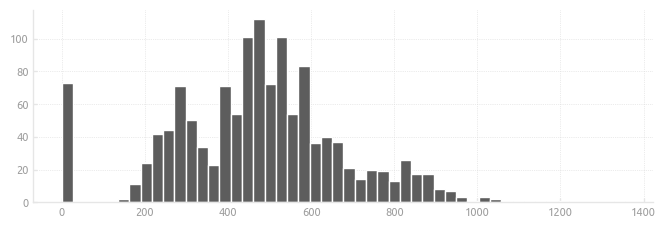

In [61]:
train['garagearea'].hist(bins=50);

In [62]:
train[features_log] = log_processor.transform(train[features_log])

for feature in features_log:
    train = train.rename(columns={feature: 'lg_'+feature})
    # rename elements in features list: add 'lg_'
    dct = {feature: 'lg_'+feature}
    features = [dct.get(n, n) for n in features]
    features_linear = [dct.get(n, n) for n in features_linear]
    features_raw = [dct.get(n, n) for n in features_raw]
    numeric = [dct.get(n, n) for n in numeric]
    numeric_linear = [dct.get(n, n) for n in numeric_linear]
    numeric_raw = [dct.get(n, n) for n in numeric_raw]

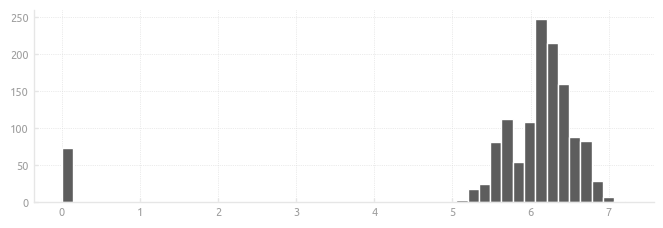

In [63]:
train['lg_garagearea'].hist(bins=50);

### Transformaton Pipeline Check

In [64]:
features_creator = FeaturesCreator(factors=True)

In [65]:
features_logger = FeaturesLogger(features_log=features_log)

In [66]:
pipeline = Pipeline(steps=[
    ('features_create', features_creator),
    ('features_log', features_logger)
])

In [67]:
train_transformed = pipeline.transform(train_raw)

In [68]:
col = train_transformed.pop('price')
train_transformed.insert(len(train_transformed.columns), 'price', col)

In [69]:
assert train_transformed.equals(train)

In [70]:
# display rows with differences
train[~train.apply(tuple,1).isin(train_transformed.apply(tuple,1))]

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price


### Correlation Matrix with New Features

In [71]:
corr_df = train[numeric + ordinal + [target]].corr()

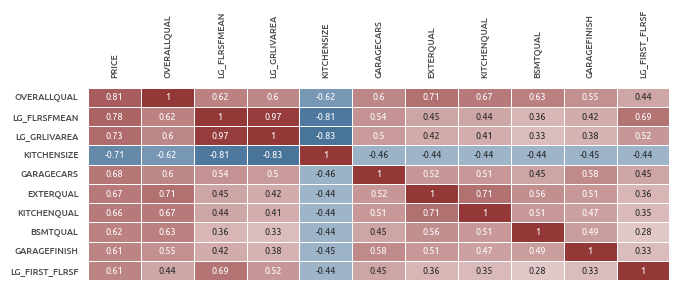

Image 'corr_matrix_new.svg' successfully saved into 'img/Section3-Feature-selection-and-Preprocessing' directory


In [72]:
fig = plot_corr_matrix(
    data=corr_df, target=target, num_features=10,
    width=0.75, height=0.25, annot=6.5, labelsize=6.5,
    linecolor=theme, full=True, abs_results=True,
    df=False, df_limit=None
)
savefig('corr_matrix_new', dir_save, dpi=125)

## Preprocessing

In [73]:
train.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,50,RL,4.465908,9.350189,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,19,70,70.0,12.429216
782,783,20,RL,4.219508,9.698061,Pave,NA,IR2,Lvl,AllPub,...,1,0,0,0,0,0,7,8,8.0,12.139399
952,953,85,RL,4.110874,8.881975,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,0,6,37,35.0,11.804849
620,621,30,RL,3.828641,9.017847,Pave,Grvl,Reg,Lvl,AllPub,...,0,1,0,0,0,0,58,94,94.0,11.112448
669,670,30,RL,4.394449,9.358847,Pave,NA,Reg,Lvl,AllPub,...,0,1,0,0,0,0,56,84,84.0,11.831379


In [74]:
train_raw = train.copy()

### Create Train dataset for further GridSearch
Transformations: only log, no encoding and scaling.

In [75]:
train_cv = train.copy()

In [76]:
train_cv.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,50,RL,4.465908,9.350189,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,19,70,70.0,12.429216
782,783,20,RL,4.219508,9.698061,Pave,NA,IR2,Lvl,AllPub,...,1,0,0,0,0,0,7,8,8.0,12.139399
952,953,85,RL,4.110874,8.881975,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,0,6,37,35.0,11.804849
620,621,30,RL,3.828641,9.017847,Pave,Grvl,Reg,Lvl,AllPub,...,0,1,0,0,0,0,58,94,94.0,11.112448
669,670,30,RL,4.394449,9.358847,Pave,NA,Reg,Lvl,AllPub,...,0,1,0,0,0,0,56,84,84.0,11.831379


### Encoding

In [77]:
encoder = Encoder(features_transform=categorical_transform)

In [78]:
encoder.fit(train, train[target])

In [79]:
train = encoder.transform(train)

In [80]:
train.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,5,3,4.465908,9.350189,1,2,1,1,1,...,0,0,0,1,0,0,19,70,70.0,12.429216
782,783,10,3,4.219508,9.698061,1,2,3,1,1,...,1,0,0,0,0,0,7,8,8.0,12.139399
952,953,7,3,4.110874,8.881975,1,2,0,1,1,...,0,0,0,0,0,0,6,37,35.0,11.804849
620,621,0,3,3.828641,9.017847,1,0,0,1,1,...,0,1,0,0,0,0,58,94,94.0,11.112448
669,670,0,3,4.394449,9.358847,1,2,0,1,1,...,0,1,0,0,0,0,56,84,84.0,11.831379


### Scaling

In [81]:
scaler = Scaler(features_transform=features)

In [82]:
scaler.fit(train[features])

In [83]:
train[features] = scaler.transform(train[features])

### Transformation Pipeline Check

In [84]:
pipeline = Pipeline(steps=[
    ('encoder', encoder),
    ('scaler', scaler)
])

In [85]:
train_transformed = pipeline.transform(train_raw)

In [86]:
assert train_transformed.equals(train)

In [87]:
# display rows with differences
train[~train.apply(tuple,1).isin(train_transformed.apply(tuple,1))]

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price


In [88]:
train.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,-1.096283,0.351287,0.834375,0.460637,0.061875,0.251891,0.856818,-0.109613,0.027629,...,-1.117459,-0.406612,-0.133631,3.371635,-0.067806,-0.194948,-0.195938,1.086695,1.457489,12.429216
782,783,0.207206,0.351287,0.035941,1.132222,0.061875,0.251891,3.884547,-0.109613,0.027629,...,0.894888,-0.406612,-0.133631,-0.296592,-0.067806,-0.194948,-0.776119,-0.946281,-0.882843,12.139399
952,953,-0.574887,0.351287,-0.316076,-0.443275,0.061875,0.251891,-0.657047,-0.109613,0.027629,...,-1.117459,-0.406612,-0.133631,-0.296592,-0.067806,-0.194948,-0.824467,0.004627,0.136334,11.804849
620,621,-2.399772,0.351287,-1.230620,-0.180967,0.061875,-4.640394,-0.657047,-0.109613,0.027629,...,-1.117459,2.459347,-0.133631,-0.296592,-0.067806,-0.194948,1.689649,1.873653,2.363424,11.112448
669,670,-2.399772,0.351287,0.602820,0.477350,0.061875,0.251891,-0.657047,-0.109613,0.027629,...,-1.117459,2.459347,-0.133631,-0.296592,-0.067806,-0.194948,1.592953,1.545754,1.985951,11.831379


## Intermediate Model #2

In [89]:
train_im = train_cv.copy()

In [90]:
train_im.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,50,RL,4.465908,9.350189,Pave,NA,IR1,Lvl,AllPub,...,0,0,0,1,0,0,19,70,70.0,12.429216
782,783,20,RL,4.219508,9.698061,Pave,NA,IR2,Lvl,AllPub,...,1,0,0,0,0,0,7,8,8.0,12.139399
952,953,85,RL,4.110874,8.881975,Pave,NA,Reg,Lvl,AllPub,...,0,0,0,0,0,0,6,37,35.0,11.804849
620,621,30,RL,3.828641,9.017847,Pave,Grvl,Reg,Lvl,AllPub,...,0,1,0,0,0,0,58,94,94.0,11.112448
669,670,30,RL,4.394449,9.358847,Pave,NA,Reg,Lvl,AllPub,...,0,1,0,0,0,0,56,84,84.0,11.831379


In [91]:
train_im.shape

(1311, 106)

### Pipeline For GridSearch

In [92]:
encoder_im = OrdinalEncoder(
    encoding_method='ordered',
    variables=categorical_transform,
    missing_values='ignore',
    unseen='encode'
)

In [93]:
lgb1 = LGBMRegressor()

In [94]:
lgb_pipeline1 = Pipeline(steps=[
    ('encoder', encoder_im),
    ('estimator', lgb1)
])

### GridSearch Iteration 1

In [95]:
params1 = {
    'estimator__n_estimators': [25, 50, 75],
    'estimator__max_depth': [3, 6, 9],
    'estimator__num_leaves': [5, 38, 300],
    'estimator__learning_rate': [0.1, 0.3],
    'estimator__random_state': [seed],
    'estimator__verbose': [-1]
}

In [96]:
n_folds1 = 20

In [97]:
cv1 = GridSearchCV(
    estimator=lgb_pipeline1, 
    param_grid=params1,
    scoring='neg_root_mean_squared_error',
    cv=n_folds1
)

In [98]:
st = stopwatch.start()
cv1.fit(train_im[features], train_im[target])
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:06:22


In [99]:
models1 = []

range1 = range(len(cv1.cv_results_['params']))
for i in range1:
    models1.append(list(cv1.cv_results_['params'][i].values()))

range2 = range(len(models1))
for j in range2:
    models1[j] = ' / '.join(str(i) for i in models1[j])

In [100]:
keys1 = []
for i in range(0, n_folds1):
    keys1.append(
        'split' + str(i) + '_test_score'
    )

In [101]:
results1 = {key: cv1.cv_results_[key] for key in keys1}

In [102]:
results_df1 = pd.DataFrame(results1)

In [103]:
results_df1 = results_df1.T

In [104]:
idx_opt1 = np.argmax(cv1.cv_results_['mean_test_score'])

In [105]:
results_df1 = pd.melt(results_df1)

In [106]:
results_df1['opt'] = results_df1['variable']==idx_opt1
results_df1['opt'] = results_df1['opt'].astype(int)

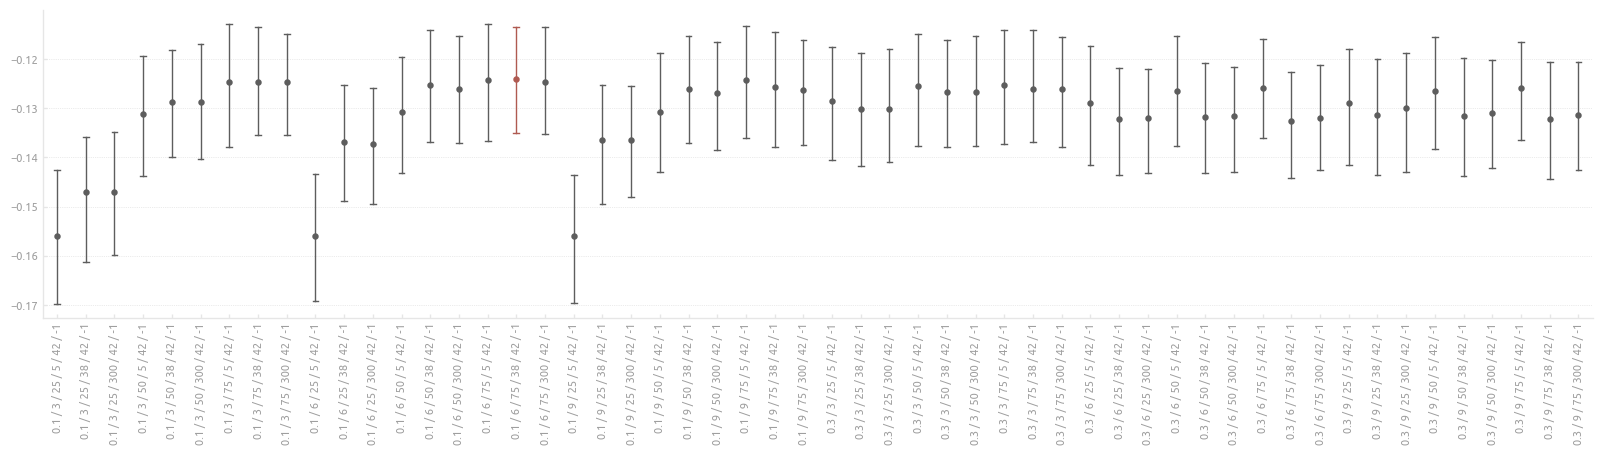

In [107]:
plt.figure(figsize=(20,4))

ax = sns.pointplot(
    results_df1,
    x='variable',
    y='value',
    hue='opt',
    markersize=3,
    linestyle='none',
    capsize=0.2,
    err_kws={'lw': 1},
    palette=[palette[0], palette[1]]
)
    
ax.set_xticks(ticks=list(set(results_df1['variable'])), labels=models1)
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
ax.get_legend().remove()

plt.show()

In [108]:
round(cv1.cv_results_['mean_test_score'][idx_opt1], 7)

-0.1240368

In [109]:
best_params1 = cv1.cv_results_['params'][idx_opt1]

In [110]:
best_params1

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 6,
 'estimator__n_estimators': 75,
 'estimator__num_leaves': 38,
 'estimator__random_state': 42,
 'estimator__verbose': -1}

### GridSearch Iteration 2

In [111]:
lgb2 = LGBMRegressor()

In [112]:
lgb_pipeline2 = Pipeline(steps=[
    ('encoder', encoder_im),
    ('estimator', lgb2)
])

In [113]:
learning_rate = [best_params1['estimator__learning_rate']]

max_depth_val = best_params1['estimator__max_depth']
max_depth = list(np.arange(max_depth_val-2, max_depth_val+3))

n_estimators_val = best_params1['estimator__n_estimators']
n_estimators = [n_estimators_val-5, n_estimators_val, n_estimators_val+5]

num_leaves_val = best_params1['estimator__num_leaves']
num_leaves = [num_leaves_val-15, num_leaves_val, num_leaves_val+15]

In [114]:
params2 = {
    'estimator__learning_rate': learning_rate,
    'estimator__max_depth': max_depth,
    'estimator__n_estimators': n_estimators,
    'estimator__num_leaves': num_leaves,
    'estimator__random_state': [seed],
    'estimator__verbose': [-1]
}

In [115]:
params2

{'estimator__learning_rate': [0.1],
 'estimator__max_depth': [4, 5, 6, 7, 8],
 'estimator__n_estimators': [70, 75, 80],
 'estimator__num_leaves': [23, 38, 53],
 'estimator__random_state': [42],
 'estimator__verbose': [-1]}

In [116]:
n_folds2 = 20

In [117]:
cv2 = GridSearchCV(
    estimator=lgb_pipeline2, 
    param_grid=params2,
    scoring='neg_root_mean_squared_error',
    cv=n_folds2
)

In [118]:
st = stopwatch.start()
cv2.fit(train_im[features], train_im[target])
print(f'Execution time: {stopwatch.stop(st)}')

Execution time: 0:05:45


In [119]:
models2 = []

range1 = range(len(cv2.cv_results_['params']))
for i in range1:
    models2.append(list(cv2.cv_results_['params'][i].values()))

range2 = range(len(models2))
for j in range2:
    models2[j] = ' / '.join(str(i) for i in models2[j])

In [120]:
keys2 = []
for i in range(0, n_folds2):
    keys2.append(
        'split' + str(i) + '_test_score'
    )

In [121]:
results2 = {key: cv2.cv_results_[key] for key in keys2}

In [122]:
results_df2 = pd.DataFrame(results2)

In [123]:
results_df2 = results_df2.T

In [124]:
idx_opt2 = np.argmax(cv2.cv_results_['mean_test_score'])

In [125]:
results_df2 = pd.melt(results_df2)

In [126]:
results_df2['opt'] = results_df2['variable']==idx_opt2
results_df2['opt'] = results_df2['opt'].astype(int)

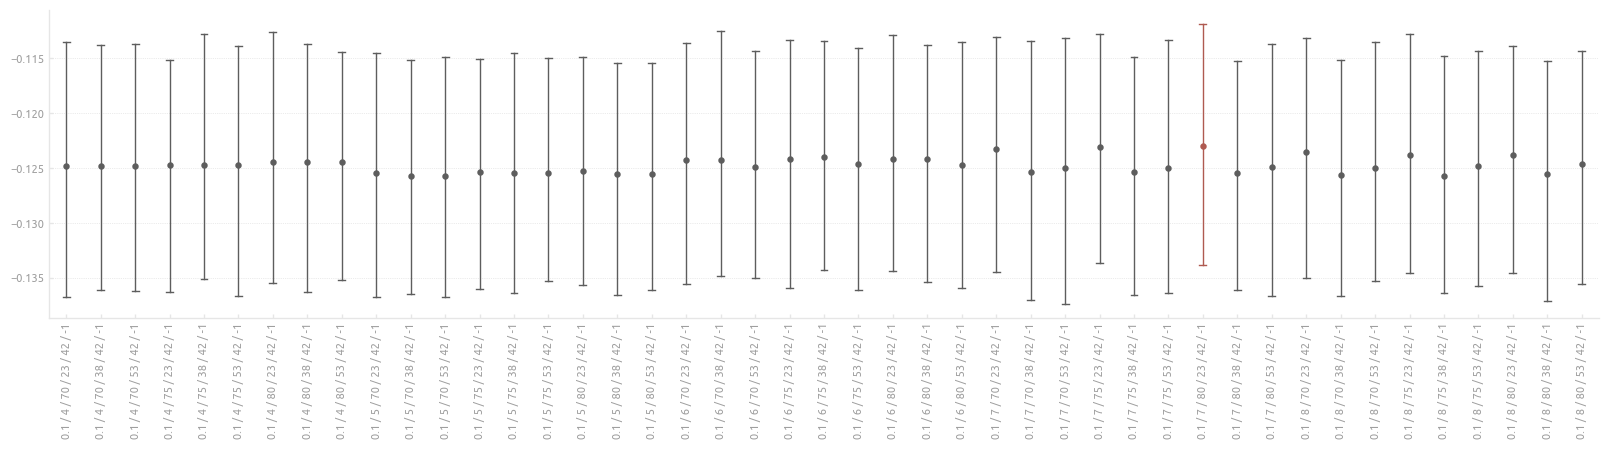

In [127]:
plt.figure(figsize=(20,4))

ax = sns.pointplot(
    results_df2,
    x='variable',
    y='value',
    hue='opt',
    markersize=3,
    linestyle='none',
    capsize=0.2,
    err_kws={'lw': 1},
    palette=[palette[0], palette[1]]
)
    
ax.set_xticks(ticks=list(set(results_df2['variable'])), labels=models2)
plt.xticks(rotation=90)
plt.xlabel(None)
plt.ylabel(None)
ax.get_legend().remove()

plt.show()

In [128]:
rmse_train_opt = cv2.cv_results_['mean_test_score'][idx_opt2]

In [129]:
rmse_train_opt

-0.12298964051879369

In [130]:
rmse_train_opt.round(4)

-0.123

In [131]:
params_opt = cv2.cv_results_['params'][idx_opt2]

In [132]:
params_opt

{'estimator__learning_rate': 0.1,
 'estimator__max_depth': 7,
 'estimator__n_estimators': 80,
 'estimator__num_leaves': 23,
 'estimator__random_state': 42,
 'estimator__verbose': -1}

In [133]:
params = {}
for key in params_opt.keys():
    new_key = key.lstrip('estimator')
    new_key = new_key.lstrip('__')
    params[new_key] = params_opt[key]

In [134]:
params

{'learning_rate': 0.1,
 'max_depth': 7,
 'n_estimators': 80,
 'num_leaves': 23,
 'random_state': 42,
 'verbose': -1}

In [135]:
lgb_opt = LGBMRegressor(**params)

In [136]:
train_im[features] = encoder_im.fit_transform(
    train_im[features], train_im[target])

In [137]:
train_im.head()

,id,mssubclass,mszoning,lg_lotfrontage,lg_lotarea,street,alley,lotshape,landcontour,utilities,...,openporchsf_exst,enclosedporch_exst,three_ssnporch_exst,screenporch_exst,poolarea_exst,miscval_exst,modage,houseage,garageage,price
907,908,5,3,4.465908,9.350189,1,2,1,1,1,...,0,0,0,1,0,0,19,70,70.0,12.429216
782,783,10,3,4.219508,9.698061,1,2,3,1,1,...,1,0,0,0,0,0,7,8,8.0,12.139399
952,953,7,3,4.110874,8.881975,1,2,0,1,1,...,0,0,0,0,0,0,6,37,35.0,11.804849
620,621,0,3,3.828641,9.017847,1,0,0,1,1,...,0,1,0,0,0,0,58,94,94.0,11.112448
669,670,0,3,4.394449,9.358847,1,2,0,1,1,...,0,1,0,0,0,0,56,84,84.0,11.831379


In [138]:
lgb_opt.fit(train_im[features], train_im[target])

LGBMRegressor(max_depth=7, n_estimators=80, num_leaves=23, random_state=42,
              verbose=-1)

In [139]:
feature_importance = pd.DataFrame({
    'Feature': lgb_opt.feature_name_,
    'Importance': lgb_opt.feature_importances_
})
feature_importance.sort_values('Importance', ascending=False, inplace=True)

In [140]:
data_plot = feature_importance.loc[feature_importance['Importance'] > 0, :]
data_plot = data_plot.sort_values('Importance', ascending=False)

In [141]:
data_plot.head()

,Feature,Importance
79,lg_flrsfmean,97
2,lg_lotarea,96
80,bedroomsize,70
60,neighborhood,67
24,lg_garagearea,58


In [142]:
values = data_plot['Importance'][:10]
labels = data_plot['Feature'][:10]

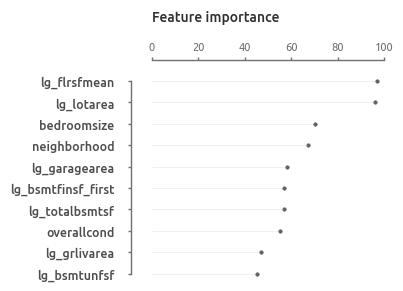

Image 'feature_importance.svg' successfully saved into 'img/Section3-Feature-selection-and-Preprocessing' directory


In [143]:
fig = plot_bar_horizontal(
    values=values,
    labels=labels,
    labelsize=9,
    labelcolor='0.3',
    labelweight='medium',
    figsize=(3, 2.5),
    kind='lol',
    width=0.5,
    s=6,
    x_lim_right=100
)
savefig('feature_importance', dir_save)

## Save Data

In [144]:
datasets_dict['train'] = train
datasets_dict['train_cv'] = train_cv

In [145]:
features_dict['features'] = features
features_dict['features_linear'] = features_linear
features_dict['features_raw'] = features_raw

features_dict['numeric'] = numeric
features_dict['numeric_linear'] = numeric_linear
features_dict['numeric_raw'] = numeric_raw

features_dict['categorical'] = categorical
features_dict['categorical_linear'] = categorical_linear
features_dict['categorical_raw'] = categorical_raw

features_dict['factor'] = factor

In [146]:
transform_dict['encoder'] = encoder
transform_dict['scaler'] = scaler

transform_dict['features_log'] = features_log
transform_dict['transformer_features_creator'] = features_creator
transform_dict['transformer_features_logger'] = features_logger

In [147]:
simulation_datasets_dict['train_iter2'] = train_im
simulation_datasets_dict['features_iter2'] = features

In [148]:
estimators_dict['lgb_iter2'] = lgb_opt

In [149]:
evaluation_dict['cv_iter2'] = cv2

In [150]:
saveit(datasets_dict, 'datasets_dict', dir_save)

In [151]:
saveit(features_dict, 'features_dict', dir_save)

In [152]:
saveit(transform_dict, 'transform_dict', dir_save)

In [153]:
saveit(simulation_datasets_dict, 'simulation_datasets_dict', dir_save)

In [154]:
saveit(estimators_dict, 'estimators_dict', dir_save)

In [155]:
saveit(evaluation_dict, 'evaluation_dict', dir_save)

In [156]:
saveit(params, 'params', dir_save)

In [157]:
saveit(feature_importance, 'feature_importance', dir_save)

### Save Session

In [158]:
save_session(dir_save)

### Execution time

In [159]:
print(f'Execution time: {stopwatch.stop(start)}')

Execution time: 0:13:12
